### Base Imports

In [602]:
# for data analysis 
import numpy as np
import pandas as pd
# from scipy import ... 
# from sklearn import ...

# for data visualization
import matplotlib.pyplot as plt
import missingno as msno # to plot missing data
import seaborn as sns
sns.set() # use seaborn defaults

# https://github.com/jgillick/LendingClub

### Set Options

In [603]:
# display options
%matplotlib inline
pd.options.display.max_rows = 999
pd.options.display.max_columns = 999

In [604]:
# Enable multiple cell outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

### Load & Explore Data

In [605]:
# df = pd.read_csv("LoanStats_2017Q4.csv", header=1, low_memory=False)
# collisions = pd.read_csv("NYPD_Motor_Vehicle_Collisions.csv", low_memory=False)

four_train = pd.read_json("foursquare_train_hard.json")
locu_train = pd.read_json("locu_train_hard.json") 
four_train = four_train.set_index('id')
locu_train = locu_train.set_index('id')

four_test = pd.read_json("foursquare_test_hard.json")
locu_test = pd.read_json("locu_test_hard.json")
four_test = four_test.set_index('id')
locu_test = locu_test.set_index('id')

matches_train = pd.read_csv("matches_train_hard.csv")
matches_train = matches_train.set_index(['locu_id', 'foursquare_id'])

(600, 10)

,country,latitude,locality,longitude,name,phone,postal_code,region,street_address,website
id,,,,,,,,,,
4f328ea619836c91c7e3714a,United States,40.794855,New York,-73.966069,Chen Jin Diao Restaurant,(212) 678-4680,NaN,NY,800 Columbus Ave.,NaN
4c37b5f6ae2da593a56affc5,United States,40.760460,New York,-73.994920,West Side Steakhouse,(212) 564-4803,10036,NY,597 10th Ave.,NaN
4b41060df964a52098bf25e3,United States,40.760249,New York,-73.983746,Pearls: Chinese & Szechuan Cuisine,(212) 582-7380,10019,NY,732 7th Ave.,NaN
3fd66200f964a520ece41ee3,United States,40.708660,New York,-74.011263,Suspenders,(212) 732-5005,10006,NY,111 Broadway,http://www.suspendersnyc.com
52064aab11d284f64d088329,United States,40.718105,New York,-73.996096,Grand Century Cafe,None,NaN,NY,NaN,NaN


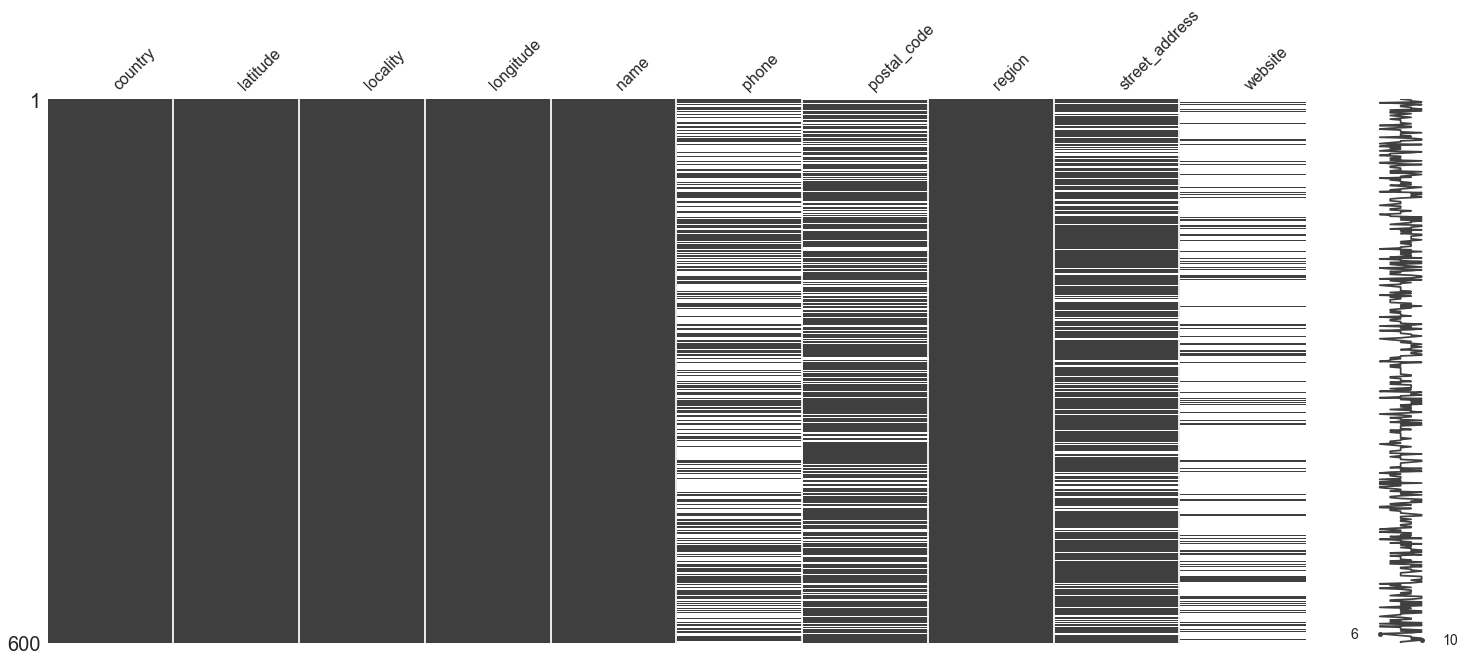

In [606]:
four_train.shape
four_train = four_train.replace("", np.nan)
four_train.head()

_ = msno.matrix(four_train)

(600, 10)

,country,latitude,locality,longitude,name,phone,postal_code,region,street_address,website
id,,,,,,,,,,
cc9e8f40230c6ead2873,United States,40.739822,New York,-73.985144,Chipotle Mexican Grill,2126736904,10010,NY,125 East 23rd St.,http://www.chipotle.com/
81df045e563fb6cab7f7,United States,40.810765,New York,-73.952591,Honey Salon Inc,2126630100,10026,NY,174 Saint Nicholas Ave.,NaN
b265cf6c80121211dbfc,United States,40.743580,New York,-73.986127,Palatte,6464763812,10016,NY,66 Madison Ave.,http://www.palattenyc.com/
4fc50abefae5311cc2b3,United States,40.828820,New York,-73.949022,Best Taste Restaurant,2122815691,10031,NY,3609 Broadway,NaN
72560dc41f1b7aed0d47,United States,40.749936,New York,-73.983849,Integra Hair System Inc,2125636786,10018,NY,11 W. 36th St. # 3,http://www.integrahair.com/


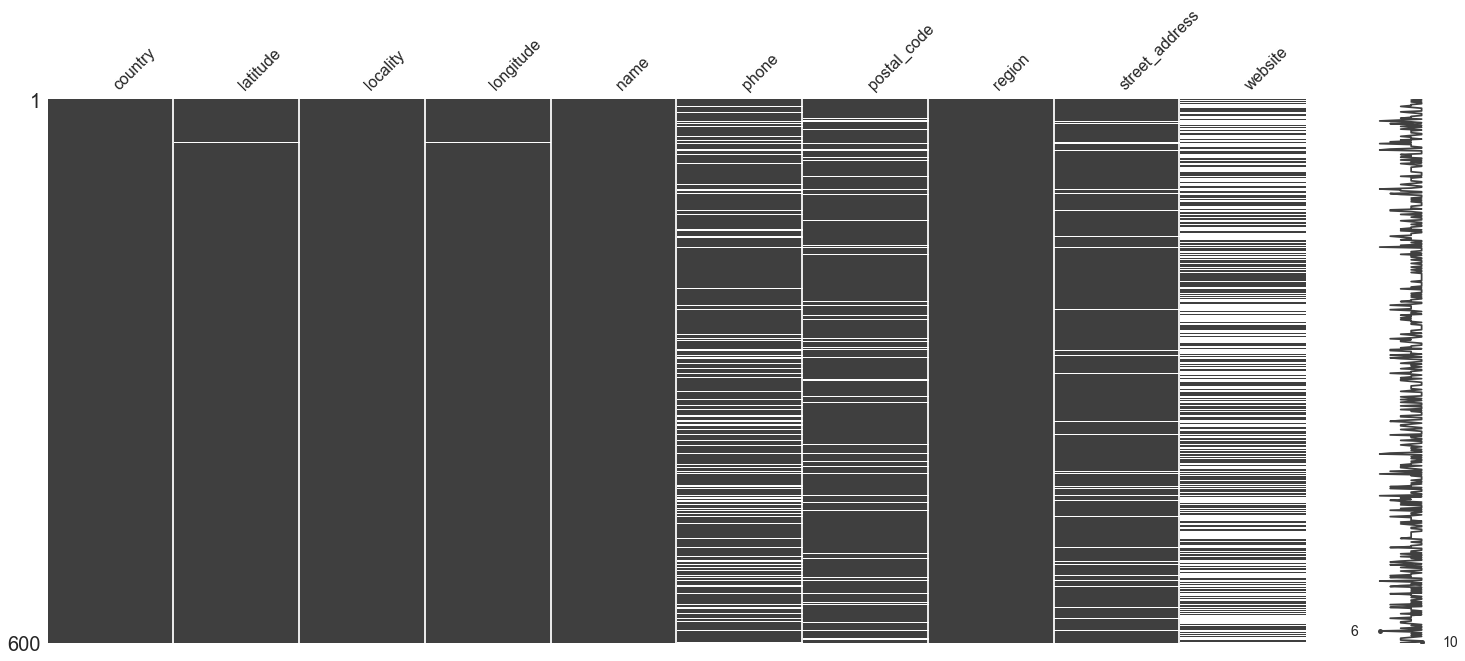

In [607]:
locu_train.shape
locu_train = locu_train.replace("", np.nan)
locu_train.head()

_ = msno.matrix(locu_train)

(400, 10)

,country,latitude,locality,longitude,name,phone,postal_code,region,street_address,website
id,,,,,,,,,,
4eefac5cb8f76a24a7b12202,United States,40.732820,New York,-73.998113,Sticky's Finger Joint,(212) 777-7131,10011,NY,31 W. 8th St.,NaN
4fb6aeabe4b02861a894f317,United States,40.769622,New York,-73.964026,Café 7,None,10021,NY,725 Park Ave. 7th Floor,NaN
4f1227d9e4b03856f12a915d,United States,40.722477,New York,-73.994903,232 Mott,None,10012,NY,232 Mott St.,NaN
51ddfccf498eefb41d65b1f1,United States,40.757635,New York,-73.985828,"Hard Rock Cafe,New York",None,NaN,NY,NaN,NaN
4d71199c783f8cfa4efae1d6,United States,40.713705,New York,-73.990162,Lo Mein/Noodles Cart,None,NaN,NY,Rutgers St.,NaN


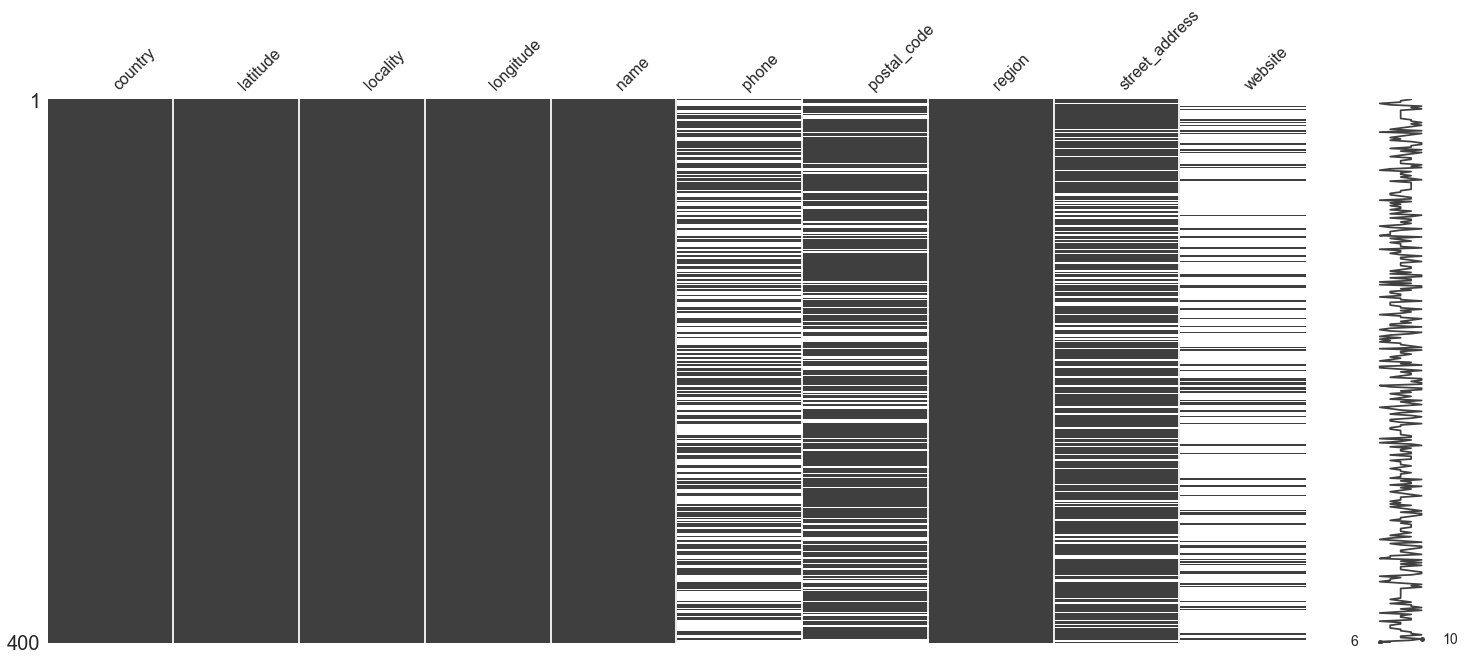

In [608]:
four_test.shape
four_test = four_test.replace("", np.nan)
four_test.head()

_ = msno.matrix(four_test)

(400, 10)

,country,latitude,locality,longitude,name,phone,postal_code,region,street_address,website
id,,,,,,,,,,
b48da849c54f904013e2,United States,40.758005,New York,-73.992727,Panda Restaurant,2126950836,10036,NY,570 9th Ave.,http://pandarg.com/
95ad783fd1c65bb8fdbf,United States,40.721025,New York,-73.982903,El Maguey y la Tuna,2124733919,10002,NY,321 East Houston St.,http://www.elmagueyylatunamex.com
5060d123ccad77923b20,United States,40.725772,New York,-73.991947,Hair Date Salon/ Professionals Hair Cut,2122288381,10003,NY,329 Bowery,http://www.hairdatenyc.com/
9dd6f6b177096efd5da4,United States,40.802047,New York,-73.936988,Pizza Plus Inc,2122890005,10035,NY,2253 3rd Ave. # 1,http://www.pizzaplusmore.com/
4773c30d2df4368c0d09,United States,40.725190,New York,-73.992547,Double Crown,2122540350,10012,NY,316 Bowery,http://doublecrown-nyc.com


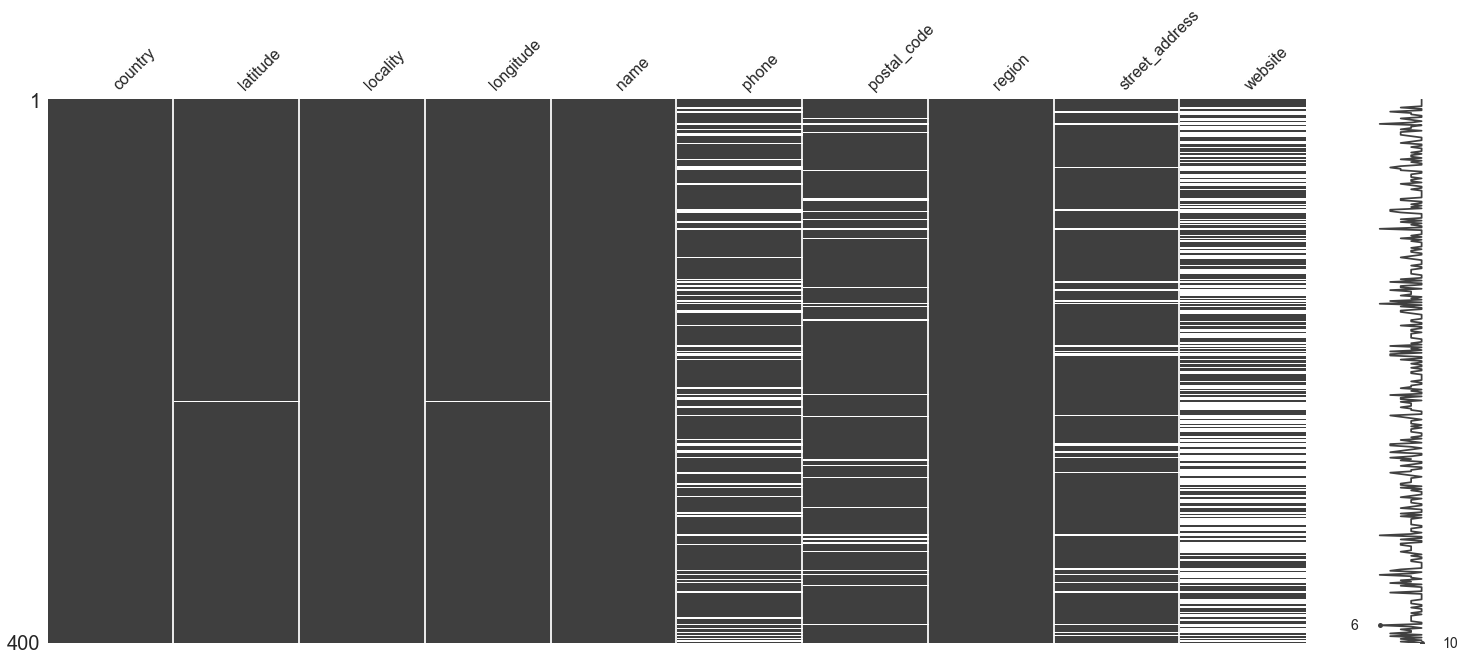

In [609]:
locu_test.shape
locu_test = locu_test.replace("", np.nan)
locu_test.head()

_ = msno.matrix(locu_test)

In [610]:
matches_train.shape
matches_train.head()

(360, 0)

,
locu_id,foursquare_id
1dae3a8f02f730c3528d,4b694c01f964a520139e2be3
219c994dcc53f891ec26,506b6162e4b02bda7fc846ee
e06dd73a03f255a877de,4fcb5d2ee4b0928dc1d32f10
cf429074f6b45f0ad183,4c2d2315e116e21e1b1a8e60
be428df89cec53c29e96,43ed7e9ef964a5204e2f1fe3


In [611]:
def get_matches(locu_train_path, foursquare_train_path, matches_train_path, locu_test_path, foursquare_test_path):
    return

In [612]:
# https://dedupe.readthedocs.io/en/latest/How-it-works.html
# Can we make these two (Record Linkage) assumptions:
# (A) two records can only refer to the same entity if they are from different datasets
# (B) no other record can match either of those two records.

# https://github.com/dedupeio/rlr
# https://recordlinkage.readthedocs.io/en/latest/about.html
from sklearn.linear_model import LogisticRegression
import recordlinkage

### Preprocessing

In [615]:
from recordlinkage.preprocessing import clean, phonenumbers

four_train.head()
locu_train.head()
four_train.dtypes
locu_train.dtypes

# remove all non-numbers from phone & convert to numeric
four_train.loc[:, 'phone'] = pd.to_numeric(phonenumbers(four_train.loc[:, 'phone']))
locu_train.loc[:, 'phone'] = pd.to_numeric(phonenumbers(locu_train.loc[:, 'phone']))

# convert postal_code to numeric
four_train.loc[:, 'postal_code'] = pd.to_numeric(four_train.loc[:, 'postal_code'])
locu_train.loc[:, 'postal_code'] = pd.to_numeric(locu_train.loc[:, 'postal_code'])

# clean street_address & website
four_train.loc[:, 'street_address'] = clean(four_train.loc[:, 'street_address'])
locu_train.loc[:, 'street_address'] = clean(locu_train.loc[:, 'street_address'])
four_train.loc[:, 'website'] = clean(four_train.loc[:, 'website'])
locu_train.loc[:, 'website'] = clean(locu_train.loc[:, 'website'])

# convert NaNs to 0s for numerics

four_train.loc[:,['latitude', 'longitude', 'phone', 'postal_code']] = \
four_train.loc[:,['latitude', 'longitude', 'phone', 'postal_code']].replace(np.nan, 0)

# four_train.loc[:,'longitude'] = four_train.loc[:,'longitude'].replace(np.nan, 0)
# four_train.loc[:,'phone'] = four_train.loc[:,'phone'].replace(np.nan, 0)
# four_train.loc[:,'postal_code'] = four_train.loc[:,'postal_code'].replace(np.nan, 0)

locu_train.loc[:,['latitude', 'longitude', 'phone', 'postal_code']] = \
locu_train.loc[:,['latitude', 'longitude', 'phone', 'postal_code']].replace(np.nan, 0)

# locu_train.loc[:,'longitude'] = locu_train.loc[:,'longitude'].replace(np.nan, 0)
# locu_train.loc[:,'phone'] = locu_train.loc[:,'phone'].replace(np.nan, 0)
# locu_train.loc[:,'postal_code'] = locu_train.loc[:,'postal_code'].replace(np.nan, 0)

# four_train = four_train[four_train.loc[latitude]].replace(np.nan, 0)
# locu_train = locu_train[].replace(np.nan, 0)

four_train.head()
locu_train.head()
four_train.dtypes
locu_train.dtypes


,country,latitude,locality,longitude,name,phone,postal_code,region,street_address,website
id,,,,,,,,,,
4f328ea619836c91c7e3714a,United States,40.794855,New York,-73.966069,Chen Jin Diao Restaurant,2.126785e+09,NaN,NY,800 columbus ave,NaN
4c37b5f6ae2da593a56affc5,United States,40.760460,New York,-73.994920,West Side Steakhouse,2.125645e+09,10036.0,NY,597 10th ave,NaN
4b41060df964a52098bf25e3,United States,40.760249,New York,-73.983746,Pearls: Chinese & Szechuan Cuisine,2.125827e+09,10019.0,NY,732 7th ave,NaN
3fd66200f964a520ece41ee3,United States,40.708660,New York,-74.011263,Suspenders,2.127325e+09,10006.0,NY,111 broadway,httpwwwsuspendersnyccom
52064aab11d284f64d088329,United States,40.718105,New York,-73.996096,Grand Century Cafe,NaN,NaN,NY,NaN,NaN


,country,latitude,locality,longitude,name,phone,postal_code,region,street_address,website
id,,,,,,,,,,
cc9e8f40230c6ead2873,United States,40.739822,New York,-73.985144,Chipotle Mexican Grill,2.126737e+09,10010.0,NY,125 east 23rd st,httpwwwchipotlecom
81df045e563fb6cab7f7,United States,40.810765,New York,-73.952591,Honey Salon Inc,2.126630e+09,10026.0,NY,174 saint nicholas ave,NaN
b265cf6c80121211dbfc,United States,40.743580,New York,-73.986127,Palatte,6.464764e+09,10016.0,NY,66 madison ave,httpwwwpalattenyccom
4fc50abefae5311cc2b3,United States,40.828820,New York,-73.949022,Best Taste Restaurant,2.122816e+09,10031.0,NY,3609 broadway,NaN
72560dc41f1b7aed0d47,United States,40.749936,New York,-73.983849,Integra Hair System Inc,2.125637e+09,10018.0,NY,11 w 36th st 3,httpwwwintegrahaircom


country            object
latitude          float64
locality           object
longitude         float64
name               object
phone             float64
postal_code       float64
region             object
street_address     object
website            object
dtype: object

country            object
latitude          float64
locality           object
longitude         float64
name               object
phone             float64
postal_code       float64
region             object
street_address     object
website            object
dtype: object

,country,latitude,locality,longitude,name,phone,postal_code,region,street_address,website
id,,,,,,,,,,
4f328ea619836c91c7e3714a,United States,40.794855,New York,-73.966069,Chen Jin Diao Restaurant,0.0,0.0,NY,800 columbus ave,NaN
4c37b5f6ae2da593a56affc5,United States,40.760460,New York,-73.994920,West Side Steakhouse,0.0,10036.0,NY,597 10th ave,NaN
4b41060df964a52098bf25e3,United States,40.760249,New York,-73.983746,Pearls: Chinese & Szechuan Cuisine,0.0,10019.0,NY,732 7th ave,NaN
3fd66200f964a520ece41ee3,United States,40.708660,New York,-74.011263,Suspenders,0.0,10006.0,NY,111 broadway,httpwwwsuspendersnyccom
52064aab11d284f64d088329,United States,40.718105,New York,-73.996096,Grand Century Cafe,0.0,0.0,NY,NaN,NaN


,country,latitude,locality,longitude,name,phone,postal_code,region,street_address,website
id,,,,,,,,,,
cc9e8f40230c6ead2873,United States,40.739822,New York,-73.985144,Chipotle Mexican Grill,0.0,10010.0,NY,125 east 23rd st,httpwwwchipotlecom
81df045e563fb6cab7f7,United States,40.810765,New York,-73.952591,Honey Salon Inc,0.0,10026.0,NY,174 saint nicholas ave,NaN
b265cf6c80121211dbfc,United States,40.743580,New York,-73.986127,Palatte,0.0,10016.0,NY,66 madison ave,httpwwwpalattenyccom
4fc50abefae5311cc2b3,United States,40.828820,New York,-73.949022,Best Taste Restaurant,0.0,10031.0,NY,3609 broadway,NaN
72560dc41f1b7aed0d47,United States,40.749936,New York,-73.983849,Integra Hair System Inc,0.0,10018.0,NY,11 w 36th st 3,httpwwwintegrahaircom


country            object
latitude          float64
locality           object
longitude         float64
name               object
phone             float64
postal_code       float64
region             object
street_address     object
website            object
dtype: object

country            object
latitude          float64
locality           object
longitude         float64
name               object
phone             float64
postal_code       float64
region             object
street_address     object
website            object
dtype: object

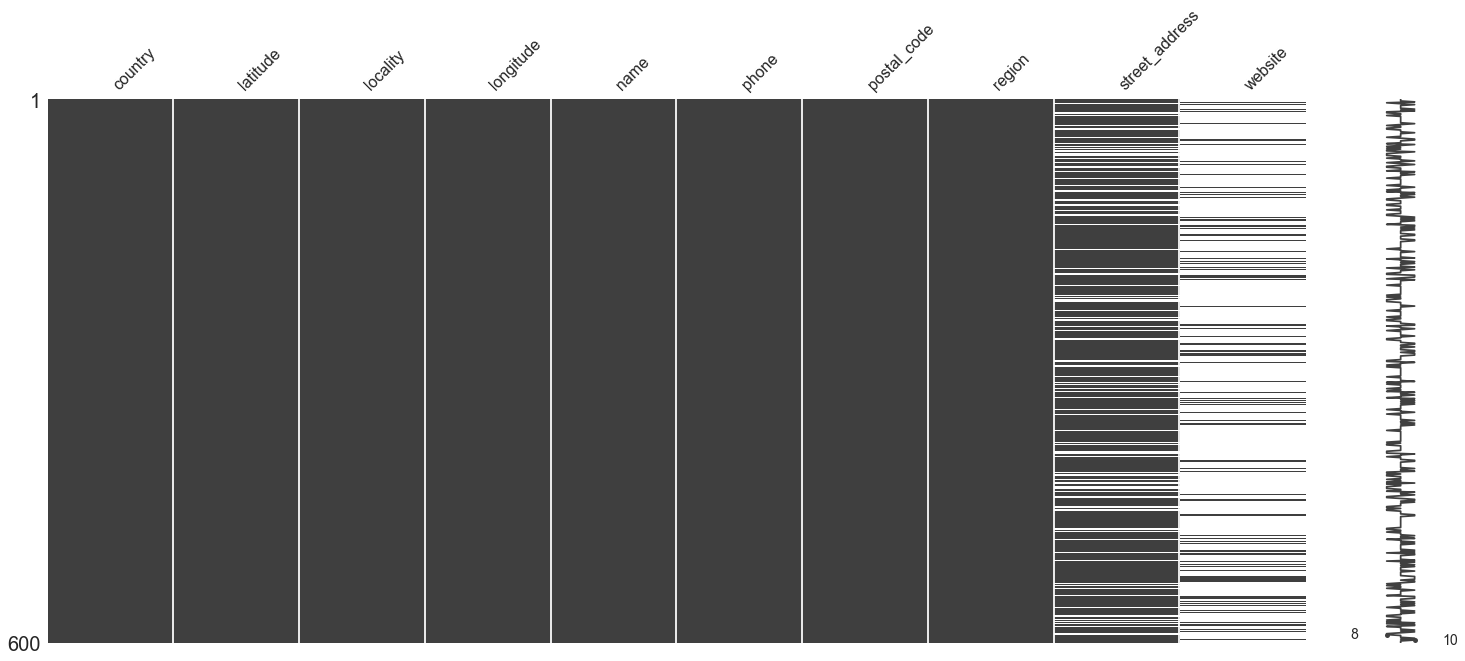

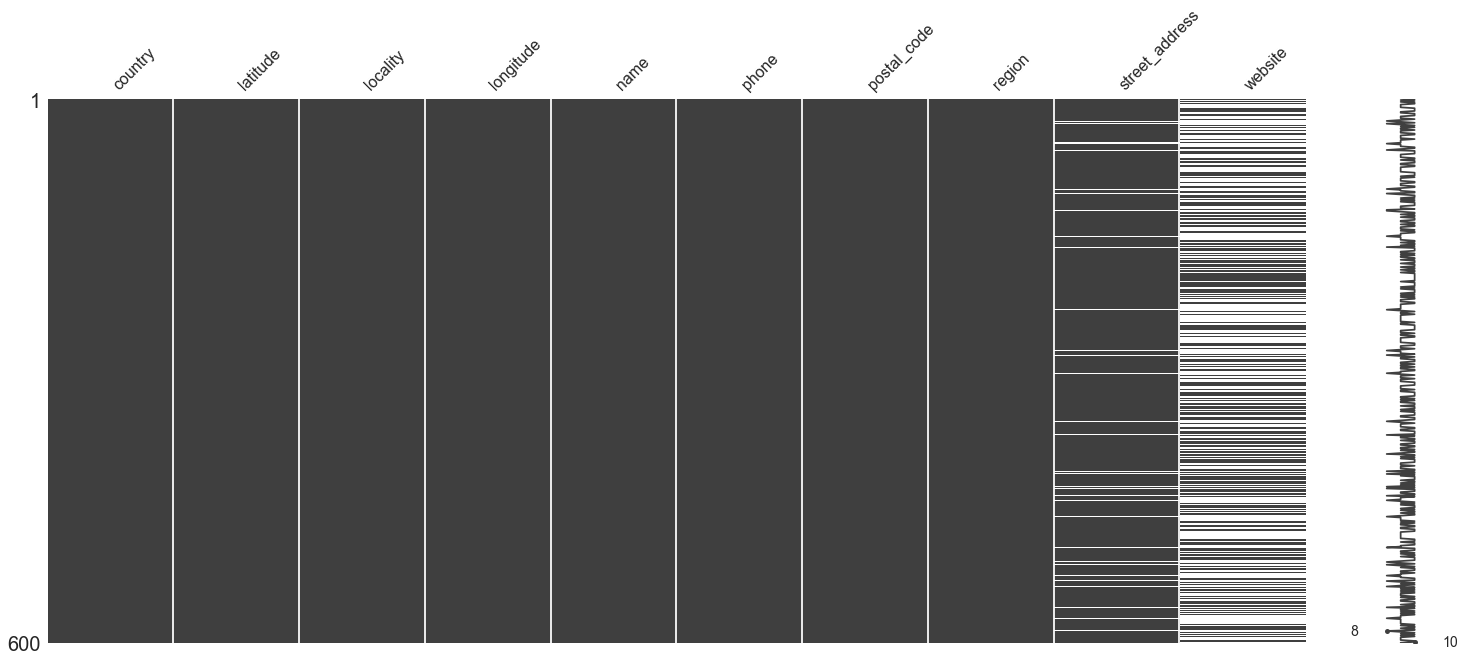

In [616]:
_ = msno.matrix(four_train)
_ = msno.matrix(locu_train)

### Compare Strings

In [618]:
# For preprocessing: https://recordlinkage.readthedocs.io/en/latest/ref-preprocessing.html
# For custom blockers: https://recordlinkage.readthedocs.io/en/latest/notebooks/custom_algorithms.html
# For multipler blockers: https://recordlinkage.readthedocs.io/en/latest/performance.html
# For ML algs: https://recordlinkage.readthedocs.io/en/latest/notebooks/classifiers.html

indexer = recordlinkage.BlockIndex(on='postal_code')
# BlockIndex(on='postal_code')
# FullIndex()
candidate_pairs = indexer.index(locu_train, four_train)

print (len(locu_train), len(four_train), len(candidate_pairs))

600 600 16035


In [650]:
compare = recordlinkage.Compare()

# initialise similarity measurement algorithms
_ = compare.string('country', 'country', method='levenshtein', label='country')
_ = compare.string('locality', 'locality', method='levenshtein', label='locality')
_ = compare.geo('latitude', 'longitude', 'latitude', 'longitude', scale=1, label='geo_coord')
_ = compare.string('name', 'name', method='levenshtein', label='name')
_ = compare.numeric('phone', 'phone', scale=1, label='phone')
_ = compare.numeric('postal_code', 'postal_code', scale=1, label='postal_code')
_ = compare.string('region', 'region', method='levenshtein', label='region')
_ = compare.string('street_address', 'street_address', method='levenshtein', label='street_address')
_ = compare.string('website', 'website', method='levenshtein', label='website')

# compute similarity measurements
features = compare.compute(candidate_pairs, locu_train, four_train)
# features.describe()
# compare.vectors

# features.shape
# features = features.loc[features['street_address'] > .3]
# features = features.loc[features['name'] > .3]

tuples = list(matches_train.index)
matches_index = pd.MultiIndex.from_tuples(tuples, names=['locu_id', 'foursquare_id'])
# matches = features.loc[matches_index]
# matches

train_pairs = features[0:2000]
train_matches_index = train_pairs.index & matches_index


features.shape
train_matches_index.shape
features.head(12)



# locu_index = [i[0] for i in tuples]
# four_index = [i[1] for i in tuples]
# four_matches = four_train.loc[four_index]
# locu_matches = locu_train.loc[locu_index]
# four_matches.head()
# locu_matches.head()
# reduce where distances are very low (drop if less than .5 Lev for example)
# weighting outcomes (Trues for than False for example)

(16035, 9)

(62,)

country  locality  geo_coord  \
id                   id                                                       
cc9e8f40230c6ead2873 43ece77ff964a520482f1fe3      1.0       1.0   0.870171   
                     4d5ed2a9196ba09393620656      1.0       1.0   0.867566   
                     3fd66200f964a5202ceb1ee3      1.0       1.0   0.802245   
                     4ba14446f964a5208da737e3      1.0       1.0   0.648378   
                     4dcf22a945ddbe15f89bea1c      1.0       1.0   0.686698   
                     4af351dcf964a5208fec21e3      1.0       1.0   0.648067   
                     4f7b3fd9e4b0d7b576d81991      1.0       1.0   0.791900   
                     4bf3e15598ac0f472a4b63a8      1.0       1.0   0.913871   
                     4acccc27f964a52095c920e3      1.0       1.0   0.838142   
                     4a58d0acf964a520f6b71fe3      1.0       1.0   0.620756   
                     4a5382d2f964a5205cb21fe3      1.0       1.0   0.992018   
                     4dc5a0e6887717c88028d7a9      1.0       1.0   0.774234   

                                                   name  phone  postal_code  \
id                   id                                                       
cc9e8f40230c6ead2873 43ece77ff964a520482f1fe3  0.181818    1.0          1.0   
                     4d5ed2a9196ba09393620656  0.227273    1.0          1.0   
                     3fd66200f964a5202ceb1ee3  0.045455    1.0          1.0   
                     4ba14446f964a5208da737e3  0.181818    1.0          1.0   
                     4dcf22a945ddbe15f89bea1c  0.318182    1.0          1.0   
                     4af351dcf964a5208fec21e3  0.181818    1.0          1.0   
                     4f7b3fd9e4b0d7b576d81991  0.090909    1.0          1.0   
                     4bf3e15598ac0f472a4b63a8  0.090909    1.0          1.0   
                     4acccc27f964a52095c920e3  0.181818    1.0          1.0   
                     4a58d0acf964a520f6b71fe3  0.090909    1.0          1.0   
                     4a5382d2f964a5205cb21fe3  1.000000    1.0          1.0   
                     4dc5a0e6887717c88028d7a9  0.090909    1.0          1.0   

                                               region  street_address  \
id                   id                                                 
cc9e8f40230c6ead2873 43ece77ff964a520482f1fe3     1.0        0.437500   
                     4d5ed2a9196ba09393620656     1.0        0.625000   
                     3fd66200f964a5202ceb1ee3     1.0        0.125000   
                     4ba14446f964a5208da737e3     1.0        0.437500   
                     4dcf22a945ddbe15f89bea1c     1.0        0.000000   
                     4af351dcf964a5208fec21e3     1.0        0.437500   
                     4f7b3fd9e4b0d7b576d81991     1.0        0.222222   
                     4bf3e15598ac0f472a4b63a8     1.0        0.437500   
                     4acccc27f964a52095c920e3     1.0        0.687500   
                     4a58d0acf964a520f6b71fe3     1.0        0.217391   
                     4a5382d2f964a5205cb21fe3     1.0        0.812500   
                     4dc5a0e6887717c88028d7a9     1.0        0.250000   

                                                website  
id                   id                                  
cc9e8f40230c6ead2873 43ece77ff964a520482f1fe3  0.315789  
                     4d5ed2a9196ba09393620656  0.000000  
                     3fd66200f964a5202ceb1ee3  0.000000  
                     4ba14446f964a5208da737e3  0.000000  
                     4dcf22a945ddbe15f89bea1c  0.000000  
                     4af351dcf964a5208fec21e3  0.000000  
                     4f7b3fd9e4b0d7b576d81991  0.000000  
                     4bf3e15598ac0f472a4b63a8  0.000000  
                     4acccc27f964a52095c920e3  0.000000  
                     4a58d0acf964a520f6b71fe3  0.526316  
                     4a5382d2f964a5205cb21fe3  1.000000  
                     4dc5a0e6887717c88028d7a9  0.000000

In [656]:
logreg = recordlinkage.LogisticRegressionClassifier()
svm = recordlinkage.SVMClassifier()

In [659]:
# Train the classifier
_ = logreg.learn(train_pairs, train_matches_index)
print ("LogReg Intercept: ", logreg.intercept)
print ("LogReg Coefficients: ", logreg.coefficients)

# Train the classifier
_ = svm.learn(train_pairs, train_matches_index)
# print ("SVM Intercept: ", svm.intercept)
# print ("SVM Coefficients: ", svm.coefficients)

LogReg Intercept:  -1.3633975353406742
LogReg Coefficients:  [-1.3633975353406742, -1.3633975353406742, 1.6508586364771627, 6.106999605057875, -1.3633975353406742, -1.3633975353406742, -1.3633975353406742, 2.8789944275875654, 0.87387720286218629]


In [661]:
# Predict the match status for all record pairs
# features.shape
# features.head()

results_index = svm.predict(features).set_names(['locu_id', 'foursquare_id'])

# test = features[results_index]

# matches_index
# results_index

# locu_train[locu_train.index == '006b18ff3990337edc5b']
# four_train[four_train.index == '3fd66200f964a52008e91ee3']

# results_index

# temp = pd.DataFrame(matches_index.levels).T
# results = pd.DataFrame(results_index.levels).T
# results = results.drop(results.index[585:590])
# results.columns = ['locu_id', 'foursquare_id']
# results = results.set_index(['locu_id', 'foursquare_id'])
# results


# tuples = list(results.index)
# clean_results_index = pd.MultiIndex.from_tuples(tuples, names=['locu_id', 'foursquare_id'])

len(features)

16035

In [662]:
confn_matrix = recordlinkage.confusion_matrix(matches_index, results_index, len(features))
confn_matrix

array([[  298,    62],
       [    4, 15671]])

In [663]:
print("Precision: ", recordlinkage.precision(confn_matrix))
print("Recall:    ", recordlinkage.recall(confn_matrix))
print("Accuracy:  ", recordlinkage.accuracy(confn_matrix))
print("F Score:   ", recordlinkage.fscore(confn_matrix))

Precision:  0.9867549668874173
Recall:     0.8277777777777777
Accuracy:   0.9958840037418147
F Score:    0.9003021148036253
